# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sultan Gemilang Kemadi
- **Email:** sultangemilang24@gmail.com
- **ID Dicoding:** sultan-gemilang

## Menentukan Pertanyaan Bisnis

- Bagaimana efek musim dan cuaca terhadap banyak pelanggan?
- Pada jam bererapa pelanggan memakai layanan kami?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
plt.style.use('default')

## Data Wrangling

### Gathering Data

Memasukan Dataset

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset\day.csv")
hour_df = pd.read_csv("Bike-sharing-dataset\hour.csv")

Milihat 5 baris pertama setiap df

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1


### Assessing Data

#### day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.00,NaN,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,NaN,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,NaN,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,NaN,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,NaN,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.duplicated().sum()

0

#### hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.00,NaN,2.50,0.50,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,NaN,1.11,0.50,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,NaN,2.00,0.00,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,NaN,3.00,1.00,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,NaN,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df.duplicated().sum()

0

### Cleaning Data

#### Memperbaiki penamaan kolom pada setiap df

##### day_df

In [13]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
col_day_df = day_df.columns

fix_day_df = day_df[[col for col in col_day_df if col != "instant" and col != "atemp"]]



In [15]:
col_convert = {'dteday' : 'date', 'yr' : 'year', 'mnth' : 'month', 'weathersit' : 'weather',
               'temp' : 'temperature', 'hum' : 'humidity', 'cnt' : 'total', 'hr' : 'hour'}

fix_day_df.rename(columns=col_convert, inplace=True)
fix_day_df.head(10)

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\703022386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df.rename(columns=col_convert, inplace=True)


,date,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,0.34,0.81,0.16,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.36,0.70,0.25,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.20,0.44,0.25,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.20,0.59,0.16,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.23,0.44,0.19,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.20,0.52,0.09,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.20,0.50,0.17,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.17,0.54,0.27,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.14,0.43,0.36,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.15,0.48,0.22,41,1280,1321


##### hour_df

In [16]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
col_hour_df = hour_df.columns

fix_hour_df = hour_df[[col for col in col_hour_df if col != "instant" and col != "atemp"]]

In [18]:
fix_hour_df.rename(columns=col_convert, inplace=True)
fix_hour_df.head(10)

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\3477579993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df.rename(columns=col_convert, inplace=True)


,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.00,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.00,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.00,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.00,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.00,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.75,0.09,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.80,0.00,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.86,0.00,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.75,0.00,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.76,0.00,8,6,14


#### Mengubah data season menjadi kategori

##### day_df

In [19]:
fix_day_df['season'] = fix_day_df['season'].astype('category')
fix_day_df['season'] = fix_day_df['season'].cat.rename_categories({1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'autumn'})
fix_day_df['season'].unique()

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\3182106908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df['season'] = fix_day_df['season'].astype('category')
C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\3182106908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df['season'] = fix_day_df['season'].cat.rename_categories({1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'autumn'})


['winter', 'spring', 'summer', 'autumn']
Categories (4, object): ['winter', 'spring', 'summer', 'autumn']

In [20]:
fix_day_df['weather'] = fix_day_df['weather'].astype('category')
fix_day_df['weather'] = fix_day_df['weather'].cat.rename_categories({1 : 'clear', 2 : 'clowdy', 3 : 'mild', 4 : 'heavy'})
fix_day_df['weather'].unique()

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\1730269327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df['weather'] = fix_day_df['weather'].astype('category')
C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\1730269327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df['weather'] = fix_day_df['weather'].cat.rename_categories({1 : 'clear', 2 : 'clowdy', 3 : 'mild', 4 : 'heavy'})


['clowdy', 'clear', 'mild']
Categories (3, object): ['clear', 'clowdy', 'mild']

##### hour_df

In [21]:
fix_hour_df['season'] = fix_hour_df['season'].astype('category')
fix_hour_df['season'] = fix_hour_df['season'].cat.rename_categories({1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'autumn'})
fix_hour_df['season'].unique()

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\2681858182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df['season'] = fix_hour_df['season'].astype('category')
C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\2681858182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df['season'] = fix_hour_df['season'].cat.rename_categories({1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'autumn'})


['winter', 'spring', 'summer', 'autumn']
Categories (4, object): ['winter', 'spring', 'summer', 'autumn']

In [22]:
fix_hour_df['weather'] = fix_hour_df['weather'].astype('category')
fix_hour_df['weather'] = fix_hour_df['weather'].cat.rename_categories({1 : 'clear', 2 : 'clowdy', 3 : 'mild', 4 : 'heavy'})
fix_hour_df['weather'].unique()

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\2753798860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df['weather'] = fix_hour_df['weather'].astype('category')
C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\2753798860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df['weather'] = fix_hour_df['weather'].cat.rename_categories({1 : 'clear', 2 : 'clowdy', 3 : 'mild', 4 : 'heavy'})


['clear', 'clowdy', 'mild', 'heavy']
Categories (4, object): ['clear', 'clowdy', 'mild', 'heavy']

##### Mengubah date menjadi format datetime

In [23]:
fix_day_df['date'] = pd.to_datetime(fix_day_df['date'])
fix_hour_df['date'] = pd.to_datetime(fix_hour_df['date'])

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\1468842172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_day_df['date'] = pd.to_datetime(fix_day_df['date'])
C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\1468842172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_hour_df['date'] = pd.to_datetime(fix_hour_df['date'])


In [24]:
fix_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17379 non-null  datetime64[ns]
 1   season       17379 non-null  category      
 2   year         17379 non-null  int64         
 3   month        17379 non-null  int64         
 4   hour         17379 non-null  int64         
 5   holiday      17379 non-null  int64         
 6   weekday      17379 non-null  int64         
 7   workingday   17379 non-null  int64         
 8   weather      17379 non-null  category      
 9   temperature  17379 non-null  float64       
 10  humidity     17379 non-null  float64       
 11  windspeed    17379 non-null  float64       
 12  casual       17379 non-null  int64         
 13  registered   17379 non-null  int64         
 14  total        17379 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(

## Exploratory Data Analysis (EDA)

### Explore season & weather Usage

Melakukan group by pada kolom season dan weather dan menghitung seberapa sering cuaca itu terjadi, banyak pelanggan registered, banyak pelanggan casual, dan totalnya

In [25]:
fix_day_df.groupby(by=['season', 'weather']).agg({
    'weather' : 'count',
    'registered': 'sum',
    'casual': 'sum',
    'total' : 'sum'
})

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\842224089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fix_day_df.groupby(by=['season', 'weather']).agg({


weather  registered  casual   total
season weather                                     
winter clear        111      270474   41562  312036
       clowdy        66      136794   18779  155573
       mild           4        3458     281    3739
spring clear        113      480598  146388  626986
       clowdy        68      231382   56714  288096
       mild           3        3087     420    3507
summer clear        136      631498  167945  799443
       clowdy        48      194272   56407  250679
       mild           4        9268    1739   11007
autumn clear        103      429036   90451  519487
       clowdy        65      264634   37876  302510
       mild          10       18161    1455   19616

### Explore mean hour Usage

Melakukan group by pada kolom hour dan menghitung jumlah pengendata registered, casual, dan total dari kedua pengendaranya

In [26]:
fix_hour_df.groupby(by=['hour']).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total' : 'sum'
})

,registered,casual,total
hour,,,
0,31755,7375,39130
1,19455,4709,24164
2,12940,3412,16352
3,6281,1893,8174
4,3554,874,4428
5,13249,1012,14261
6,52115,3017,55132
7,146134,8037,154171
8,245240,15761,261001


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\sulta\AppData\Local\Temp\ipykernel_66616\2205979595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = fix_day_df.groupby(by=['season', 'weather']).agg({


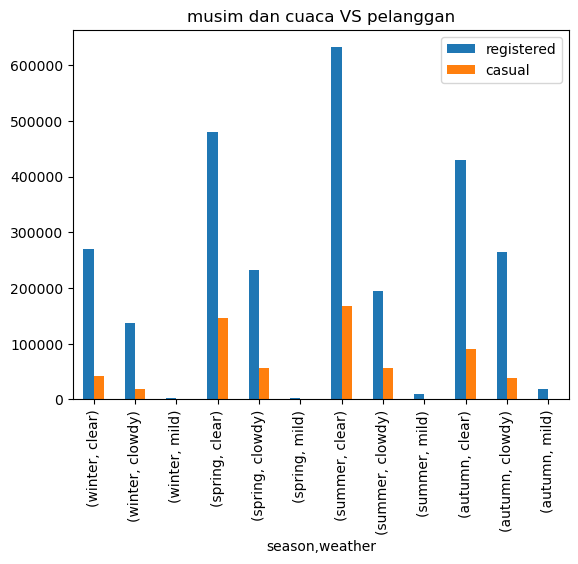

In [27]:
data = fix_day_df.groupby(by=['season', 'weather']).agg({
    'registered': 'sum',
    'casual': 'sum'
}).plot(kind="bar", title="musim dan cuaca VS pelanggan")

### Pertanyaan 2:

([<matplotlib.axis.XTick at 0x2349d192170>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

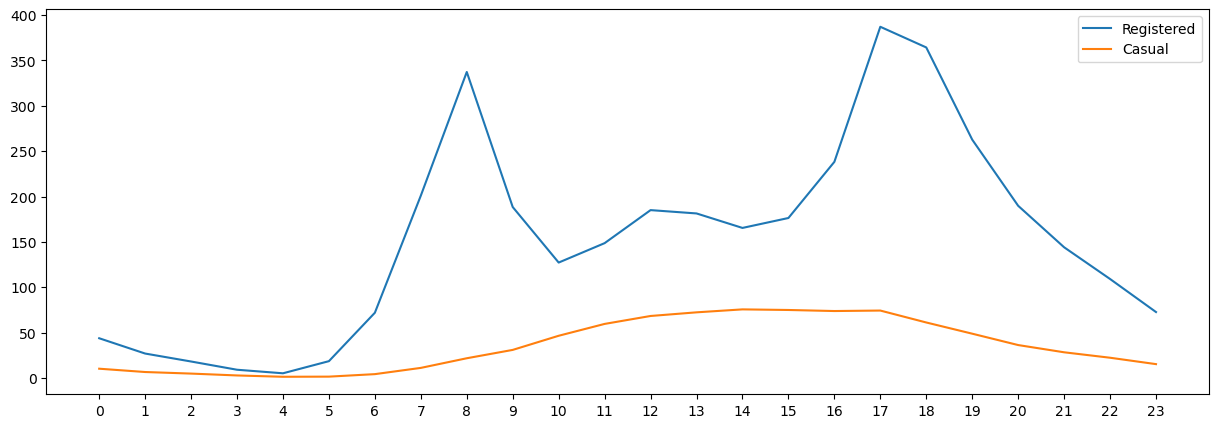

In [30]:
data = fix_hour_df.groupby(by=['hour']).agg({
    'registered': 'mean',
    'casual': 'mean'
})

plt.figure(figsize=(15,5))
plt.plot(data)
plt.legend(['Registered', 'Casual', 'Total'])
plt.xticks(range(24))

## Conclusion

- Penggunaan sepeda terbanyak berada pada ucaca 'clear' dengan penggunaan paling tinggi berada pada musim panas dan penggunaan sepeda paling sedikit ketika terdapat hujan mild hingga heavy dengan musim terendah yaitu winter.
- Kebanyakan pelanggan yang teregistrasi menggunakan sepeda dari jam 6 - 10 dan 16 - 19. Sedangkan Pelanggan casula memiliki kenaikan penggunaan mulai dari jam 9 hingga 19 secara merata.

In [29]:
fix_day_df.to_csv("day_df.csv", index=False)
fix_hour_df.to_csv("hour_df.csv", index=False)